
<div style="text-align: center; background-color: #00565C; padding: 20px; border-radius: 15px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">Airbnb Europe Project</span>
</div>




𝐎𝐛𝐣𝐞𝐜𝐭𝐢𝐯𝐞:

The purpose of this analysis is to explore relationships between price, guest satisfaction, room types, and location-based variables for Airbnb listings. We will use various visualizations and statistical summaries to uncover patterns and insights.

𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐞𝐬:

Based on the dataset, we define the following hypotheses to explore relationships between various attributes of Airbnb listings and guest satisfaction or pricing:

1.Price and Guest Satisfaction
Hypothesis: Higher-priced listings will generally have higher guest satisfaction scores, assuming that price reflects quality and amenities provided.

2.Room Type and Price
Hypothesis: Entire homes/apartments will have a higher price range compared to private or shared rooms due to the added privacy and amenities.

3.Superhost Status and Guest Satisfaction
Hypothesis: Listings managed by Superhosts are likely to have higher guest satisfaction scores, as Superhosts are known for delivering superior guest experiences.

4.Distance to City Center and Price
Hypothesis: Listings closer to the city center will have higher prices, as proximity to central attractions and amenities is generally valued by guests.

5.Attraction Index and Guest Satisfaction
Hypothesis: Listings with a higher attraction index (proximity to popular attractions) will have higher guest satisfaction scores, as tourists value accessibility to key sights.

These hypotheses will guide our analysis and inform our interpretation of the results.

<div style="text-align: center; background-color: #56B7A4; padding: 10px; border-radius: 15px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Libraries & Loading Data</span>
</div>

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display

In [ ]:
df = pd.read_csv("Aemf1.csv")

<div style="text-align: center; background-color: #56B7A4; padding: 10px; border-radius: 15px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Exploratory Data Analysis</span>
</div>

<div style="text-align: left; padding: 20px;">
    <span style="color: #00847E; font-size: 25px; font-weight: bold;">General Information
</span>
</div>

In [8]:
df.shape

(41714, 19)

In [9]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [49]:
df.tail(20)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
41694,Vienna,249.164388,Weekend,Entire home/apt,False,False,4.0,False,1,0,10.0,100.0,1,1.173418,0.374738,163.440733,11.704547,254.705433,6.156132
41695,Vienna,319.753173,Weekend,Entire home/apt,False,False,4.0,False,1,0,9.0,89.0,1,0.487689,0.068705,245.655675,17.592239,473.086475,11.434318
41696,Vienna,162.213963,Weekend,Entire home/apt,False,False,3.0,True,0,0,9.0,93.0,1,1.936871,0.476208,151.126089,10.822653,234.694704,5.672480
41697,Vienna,460.930744,Weekend,Entire home/apt,False,False,5.0,False,0,1,10.0,80.0,1,0.952005,0.081904,174.874068,12.523327,282.986054,6.839664
41698,Vienna,486.408153,Weekend,Entire home/apt,False,False,6.0,True,0,0,10.0,99.0,2,1.232625,0.496642,150.768324,10.797033,228.801431,5.530042
41699,Vienna,167.823668,Weekend,Private room,False,True,2.0,False,1,0,10.0,96.0,1,1.280287,0.444354,149.300199,10.691895,229.957194,5.557977
41700,Vienna,393.848024,Weekend,Private room,False,True,3.0,False,0,0,10.0,50.0,0,0.456126,0.236242,235.502823,16.865158,478.015794,11.553457
41701,Vienna,614.028937,Weekend,Entire home/apt,False,False,6.0,False,0,0,9.0,95.0,2,1.038507,0.205664,164.031225,11.746834,274.494330,6.634422
41702,Vienna,243.554683,Weekend,Entire home/apt,False,False,2.0,True,0,0,10.0,100.0,1,1.947562,0.337934,105.912700,7.584769,163.671964,3.955888
41703,Vienna,359.021107,Weekend,Private room,False,True,5.0,False,0,1,10.0,100.0,1,0.913670,0.318838,193.594641,13.863971,307.871919,7.441146


In [10]:
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

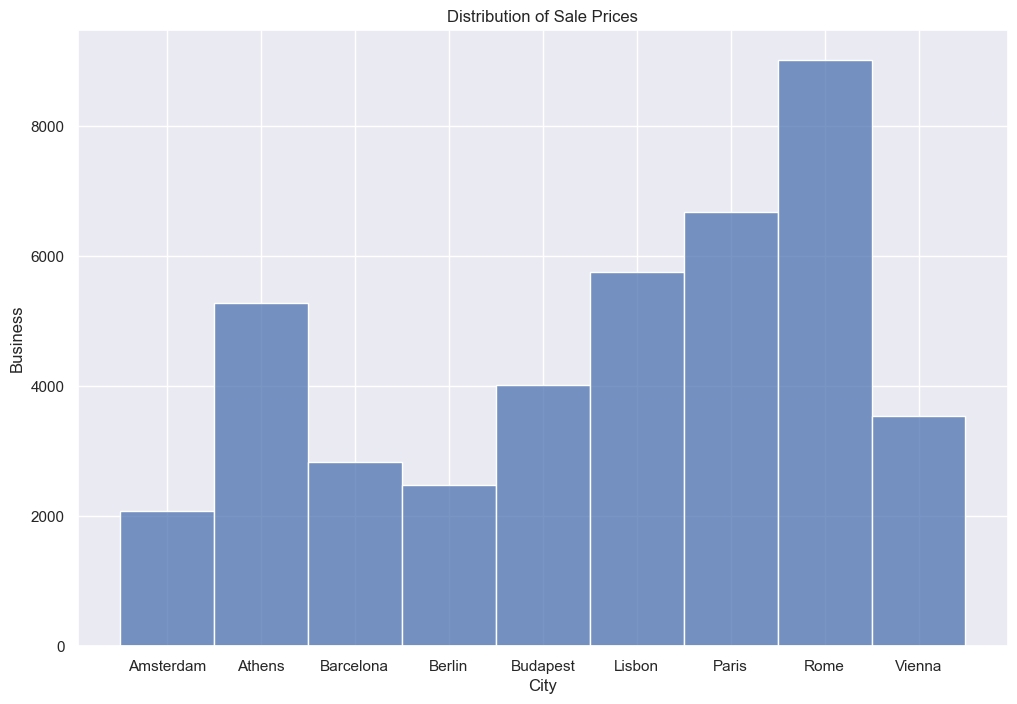

In [70]:
sns.set(rc={'figure.figsize': (12, 8)})
sns.histplot(df['City'], kde=False, bins=20)
plt.xlabel("City")
plt.ylabel("Business")
plt.title("Distribution of Sale Prices")
plt.show()

In [59]:
df.describe(include='object')

,City,Day,Room Type
count,41714,41714,41714
unique,9,2,3
top,Rome,Weekday,Entire home/apt
freq,9027,20886,28264


In [61]:
df_null=df.isna().sum()
df_null[df_null>0]

Series([], dtype: int64)

In [62]:
df_null=df.isna().sum()/df.shape[0]*100
df_null[df_null>0]

Series([], dtype: float64)

In [63]:
df.duplicated().sum()

0

In [64]:
for i in df.columns:
    print(i,':',df[i].nunique())

City : 9
Price : 8087
Day : 2
Room Type : 3
Shared Room : 2
Private Room : 2
Person Capacity : 5
Superhost : 2
Multiple Rooms : 2
Business : 2
Cleanliness Rating : 9
Guest Satisfaction : 51
Bedrooms : 9
City Center (km) : 41714
Metro Distance (km) : 41714
Attraction Index : 41714
Normalised Attraction Index : 41697
Restraunt Index : 41714
Normalised Restraunt Index : 41697


In [66]:
df

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [12]:
numeric_columns=df.select_dtypes(include='number').columns 
numeric_columns

Index(['Price', 'Person Capacity', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [13]:
categorical_columns=df.select_dtypes(include='object').columns 
categorical_columns

Index(['City', 'Day', 'Room Type'], dtype='object')

In [14]:
num_categories = df[categorical_columns].nunique()
print('number of unique categories:\n',num_categories)

number of unique categories:
 City         9
Day          2
Room Type    3
dtype: int64


In [16]:
df = df.sort_values

In [26]:
df = pd.read_csv("Aemf1.csv")
df.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [25]:
df = pd.read_csv("Aemf1.csv")
df.isnull().sum()


City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [27]:
df.duplicated().sum()

0

<div style="text-align: left; padding: 20px;">
    <span style="color: #00847E; font-size: 25px; font-weight: bold;">Numerical features
</span>
</div>

In [30]:
def numeric_visualization(column):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    colors = {'normal': tail, 'abnormal': orange}

    #Histogram
    sns.histplot(x=column, data=df, hue=df['label'], palette=colors, ax=ax[0], bins=20)
    ax[0].set_title(f'{column} Histogram', fontsize=18)
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[0].set_xlabel(column, fontsize=18)
    ax[0].set_ylabel('Count', fontsize=18)

    #Box plot
    sns.boxplot(x=column, data=df, y=df['label'], ax=ax[1], palette=colors)
    ax[1].set_title(f'{column} Box Plot', fontsize=18)
    ax[1].tick_params(axis='both', which='major', labelsize=15)
    ax[1].set_xlabel(column, fontsize=18)
    ax[1].set_ylabel('Label', fontsize=18)

    plt.tight_layout()
    plt.show()

In [31]:
def feature_statistics(column):
    #Extract columns
    normal = df[df['label']=='normal'][column]
    abnormal = df[df['label']=='abnormal'][column]


    #normal class
    normal_mean = round(normal.mean(), 2)
    normal_median = round(normal.median(), 2)
    normal_std = round(normal.std(), 2)
    normal_min = round(normal.min(), 2)
    normal_max = round(normal.max(), 2)
    normal_iqr = round(normal.quantile(0.75)-normal.quantile(0.25), 2)

    #abnormal class
    abnormal_mean = round(abnormal.mean(), 2)
    abnormal_median = round(abnormal.median(), 2)
    abnormal_std = round(abnormal.std(), 2)
    abnormal_min = round(abnormal.min(), 2)
    abnormal_max = round(abnormal.max(), 2)
    abnormal_iqr = round(abnormal.quantile(0.75)-abnormal.quantile(0.25), 2)



    result = pd.DataFrame({'Measure': ['Mean', 'Median', 'Std Deviation', 'Min', 'Max', 'IQR'],
                          'normal' : [normal_mean, normal_median, normal_std, normal_min,normal_max, normal_iqr],
                          'abnormal': [abnormal_mean, abnormal_median, abnormal_std, abnormal_min, abnormal_max, abnormal_iqr]}).set_index('Measure')


    return result